In [ ]:
### EP2 MAC0417 / MAC5768
###################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP,  #
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO      #
# DESTE EP.                                                       #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM,    #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM           #
# DESONESTIDADE ACADÊMICA OU PLÁGIO.                              #
#                                                                 #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS         #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A           #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E         #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS     #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP.                            #
#                                                                 #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO          #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR              #
# DESONESTIDADE ACADÊMICA.                                        #
#                                                                 #
#                                                                 #
# Nome : Caio Dantas Simao Ugeda                                  #
# NUSP : 11796868                                                 #
# Turma: 2024                                                     #
# Prof.: Ronaldo                                                  #
###################################################################

In [1]:
from os import listdir, stat, makedirs
from os.path import isfile, join, getsize, exists
import pandas as pd
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from cv2 import resize, imwrite
import cv2 as cv2

In [2]:
def plot_images(title, images):
  columns = len(images)
  i = 0
  for _, img in images:
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    i += 1
  plt.suptitle(title)
  plt.show()

In [14]:
def save_images(images, path):
  for filename, image in images:
    imwrite(join(path, filename), image)

In [3]:
df = pd.read_csv('./metadata.csv')

classesDict = {}
backgroundDict = {}
lightDict = {}

for idx, row in df.iterrows():
  if backgroundDict.get(row['fundo']) is None:
      backgroundDict[row['fundo']] = []
  if lightDict.get(row['luz']) is None:
      lightDict[row['luz']] = []
  backgroundDict[row['fundo']].append(row['imagem'])
  lightDict[row['luz']].append(row['imagem'])
  for classe in row['classes'].split(","):
    if classesDict.get(classe) is None:
      classesDict[classe] = []
    classesDict[classe].append(row['imagem'])

In [4]:
DATASET_GRAY = './images_gray'
AUGMENTED_DATASET = './augmented_dataset'
AUGMENTED_DATASET_CONTRAST_STRETCH = './augmented_dataset/contraststretch'
AUGMENTED_DATASET_LOG = './augmented_dataset/log'
AUGMENTED_DATASET_EXPO = './augmented_dataset/expo'
AUGMENTED_DATASET_LAPLACE = './augmented_dataset/laplace'
AUGMENTED_DATASET_MEAN = './augmented_dataset/mean'

EQUALIZED_DATASET = './equalized_dataset'
EQUALIZED_DATASET_GRAY = './equalized_dataset/gray'
EQUALIZED_DATASET_CONTRAST_STRETCH = './equalized_dataset/contraststretch'
EQUALIZED_DATASET_LOG = './equalized_dataset/log'
EQUALIZED_DATASET_EXPO = './equalized_dataset/expo'
EQUALIZED_DATASET_LAPLACE = './equalized_dataset/laplace'
EQUALIZED_DATASET_MEAN = './equalized_dataset/MEAN'

In [5]:
if not exists(EQUALIZED_DATASET):
  makedirs(EQUALIZED_DATASET)
if not exists(EQUALIZED_DATASET_GRAY):
  makedirs(EQUALIZED_DATASET_GRAY)
if not exists(EQUALIZED_DATASET_CONTRAST_STRETCH):
  makedirs(EQUALIZED_DATASET_CONTRAST_STRETCH)
if not exists(EQUALIZED_DATASET_LOG):
  makedirs(EQUALIZED_DATASET_LOG)
if not exists(EQUALIZED_DATASET_EXPO):
  makedirs(EQUALIZED_DATASET_EXPO)
if not exists(EQUALIZED_DATASET_LAPLACE):
  makedirs(EQUALIZED_DATASET_LAPLACE)
if not exists(EQUALIZED_DATASET_MEAN):
  makedirs(EQUALIZED_DATASET_MEAN)

In [6]:
def show_hist(hist, title = ''):
  plt.figure(figsize=(10, 6))
  plt.bar(range(len(hist)), hist, width=1.0, edgecolor='black')
  plt.title(f"Histograma {title}")
  plt.xlabel("Intensidade")
  plt.ylabel("Frequência")
  plt.grid(True)
  plt.show()

In [7]:
def generate_mean_hist_from_images(images):
  num_bins = 256

  hist_sum = np.zeros(num_bins)
  bins_sum = np.zeros(num_bins)

  for _, image in images:
      hist, _ = np.histogram(image, bins=num_bins, range=(0, 256))
      hist_sum += hist

  hist_mean = hist_sum / len(images)

  return hist_mean

In [8]:
def generated_equalized_image(image):
  hist, _ = np.histogram(image.flatten(), bins=256, range=(0, 256))

  hist_sum = hist.cumsum()

  hist_scale = (hist_sum - hist_sum.min()) * 255 / (hist_sum.max() - hist_sum.min())
  hist_scale = hist_scale.astype('uint8')

  image_equalized = hist_scale[image]

  return image_equalized

In [9]:
def get_images_by_names(images, names):
  result_images = []
  for image in images:
    if image[0] in names:
      result_images.append(image)
  return result_images

# Histograms before equalization

Gray dataset

In [10]:
gray_dataset = [(f, imread(join(DATASET_GRAY, f))) for f in listdir(DATASET_GRAY)]

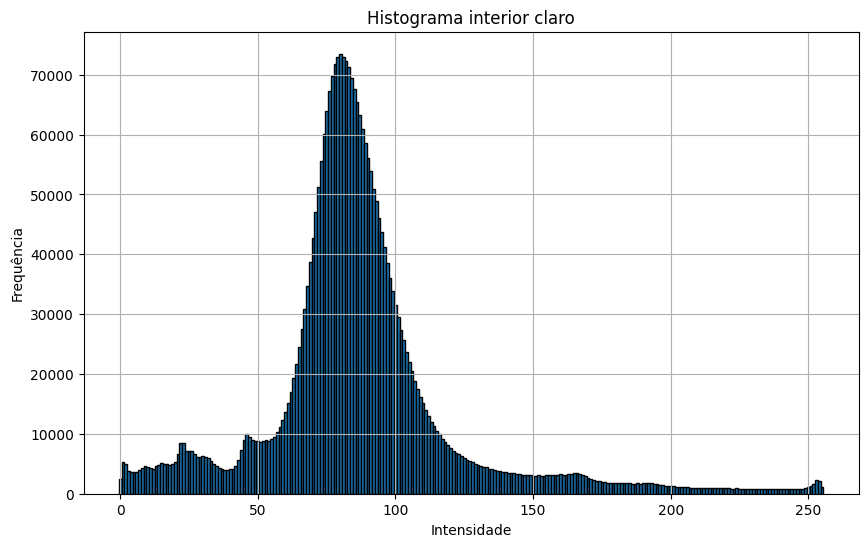

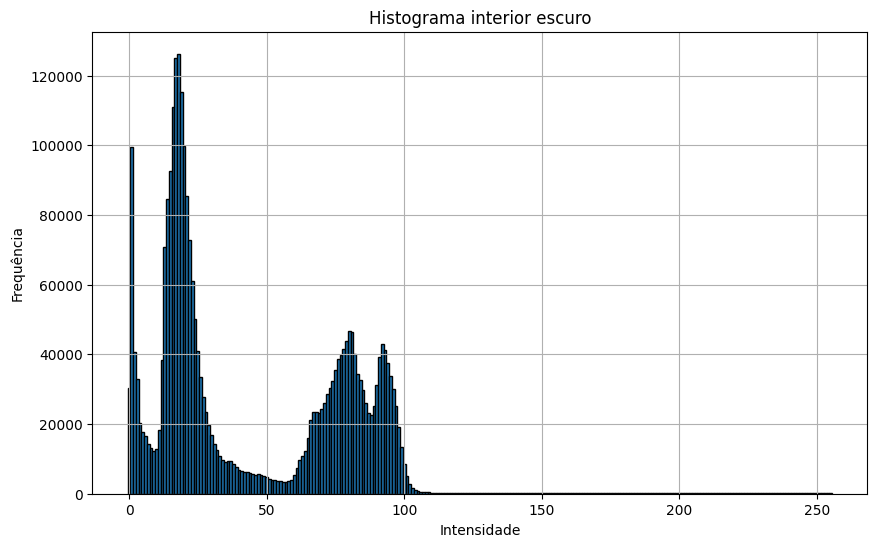

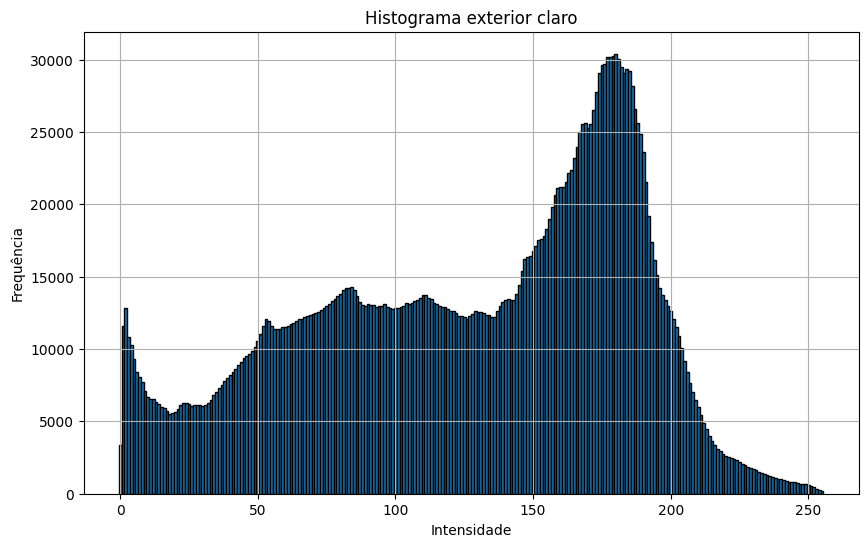

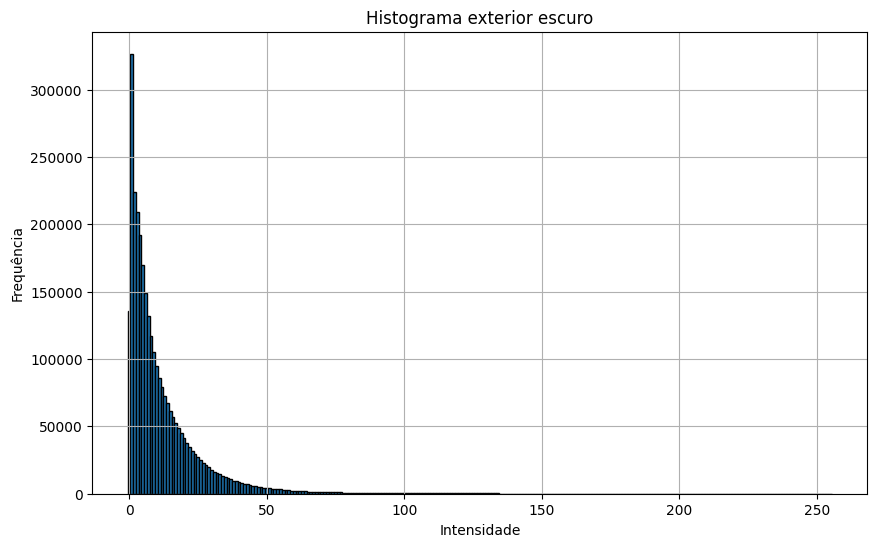

In [11]:
for light_title, images_titles in lightDict.items():
  images = get_images_by_names(gray_dataset, images_titles)
  hist = generate_mean_hist_from_images(images)
  show_hist(hist, light_title)

Augmented dataset

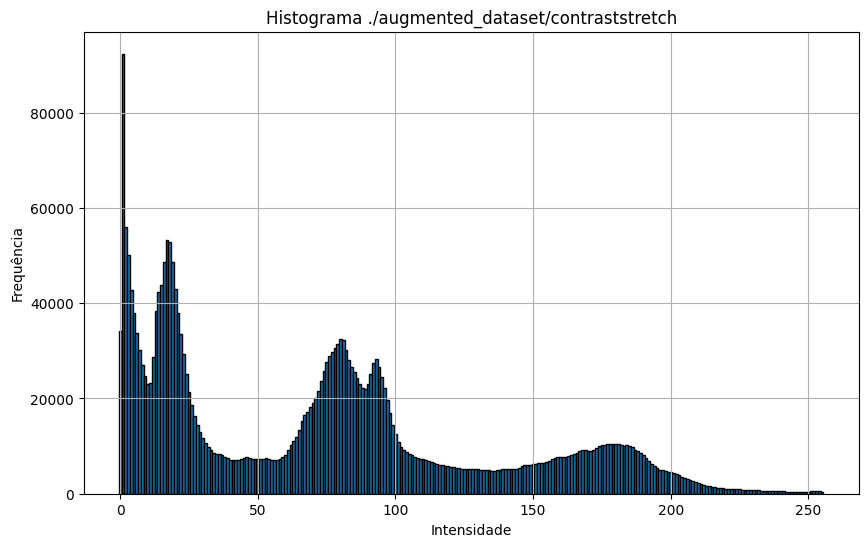

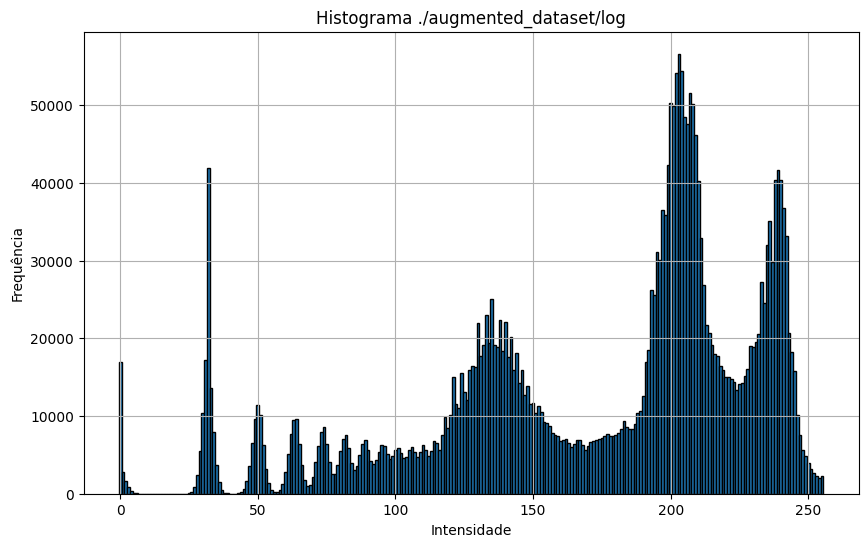

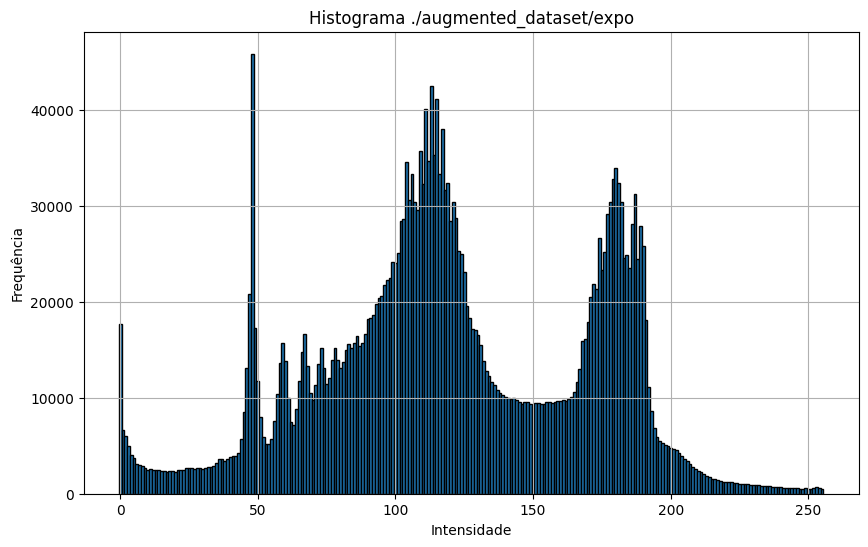

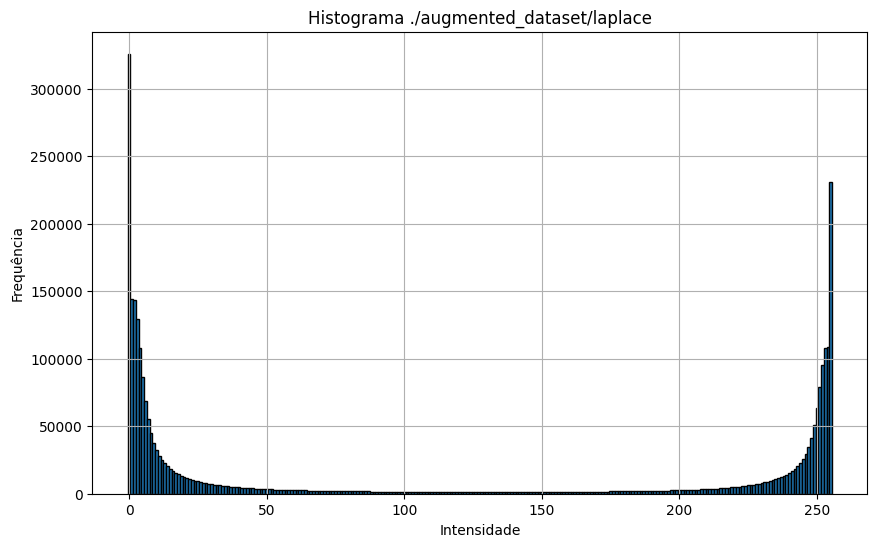

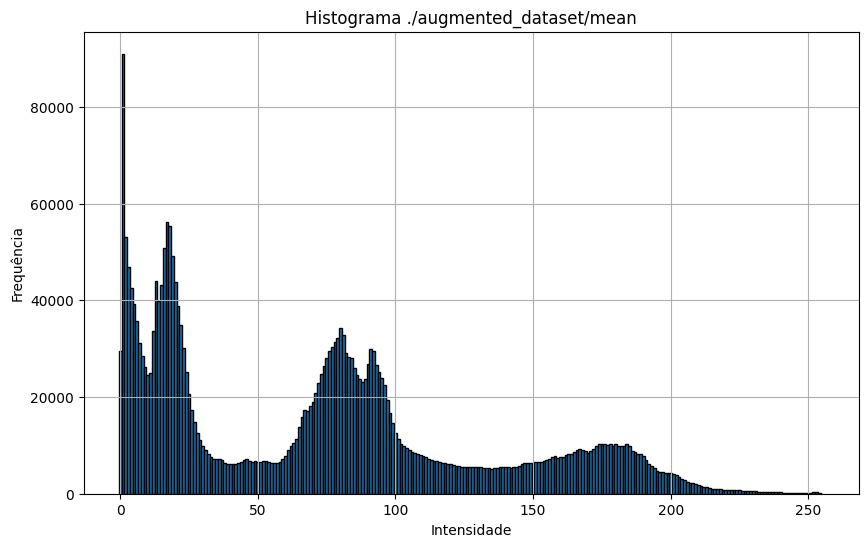

In [12]:
datasets = [AUGMENTED_DATASET_CONTRAST_STRETCH, AUGMENTED_DATASET_LOG, AUGMENTED_DATASET_EXPO, AUGMENTED_DATASET_LAPLACE, AUGMENTED_DATASET_MEAN]
for dataset in datasets:
  images = [(f, imread(join(dataset, f))) for f in listdir(dataset)]
  hist = generate_mean_hist_from_images(images)
  show_hist(hist, dataset)

# Equalization

In [15]:
gray_equalized_images = [(filename, generated_equalized_image(image)) for filename, image in gray_dataset]
save_images(gray_equalized_images, EQUALIZED_DATASET_GRAY)

In [16]:
contrast_stretched_dataset = [(f, imread(join(AUGMENTED_DATASET_CONTRAST_STRETCH, f))) for f in listdir(AUGMENTED_DATASET_CONTRAST_STRETCH)]
gray_equalized_images = [(filename, generated_equalized_image(image)) for filename, image in contrast_stretched_dataset]
save_images(gray_equalized_images, EQUALIZED_DATASET_CONTRAST_STRETCH)

In [17]:
log_dataset = [(f, imread(join(AUGMENTED_DATASET_LOG, f))) for f in listdir(AUGMENTED_DATASET_LOG)]
log_equalized_images = [(filename, generated_equalized_image(image)) for filename, image in log_dataset]
save_images(log_equalized_images, EQUALIZED_DATASET_LOG)

In [18]:
expo_dataset = [(f, imread(join(AUGMENTED_DATASET_EXPO, f))) for f in listdir(AUGMENTED_DATASET_EXPO)]
expo_equalized_images = [(filename, generated_equalized_image(image)) for filename, image in expo_dataset]
save_images(expo_equalized_images, EQUALIZED_DATASET_EXPO)

In [19]:
laplace_dataset = [(f, imread(join(AUGMENTED_DATASET_LAPLACE, f))) for f in listdir(AUGMENTED_DATASET_LAPLACE)]
laplace_equalized_images = [(filename, generated_equalized_image(image)) for filename, image in laplace_dataset]
save_images(laplace_equalized_images, EQUALIZED_DATASET_LAPLACE)

In [20]:
mean_dataset = [(f, imread(join(AUGMENTED_DATASET_MEAN, f))) for f in listdir(AUGMENTED_DATASET_MEAN)]
mean_equalized_images = [(filename, generated_equalized_image(image)) for filename, image in mean_dataset]
save_images(mean_equalized_images, EQUALIZED_DATASET_MEAN)

# Histograms after equalization

Gray dataset

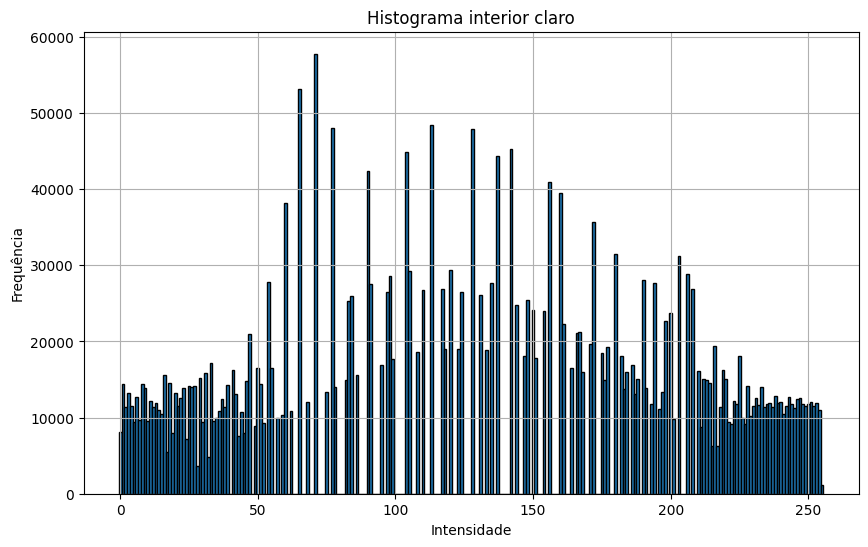

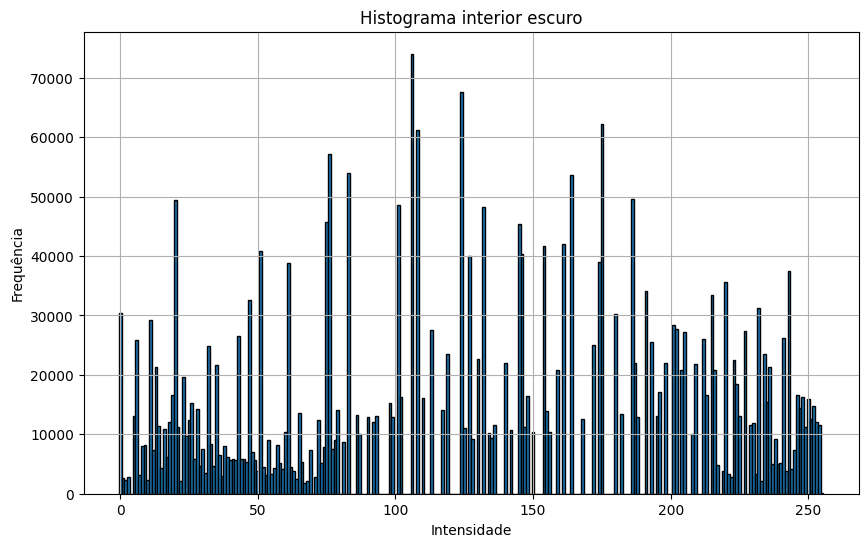

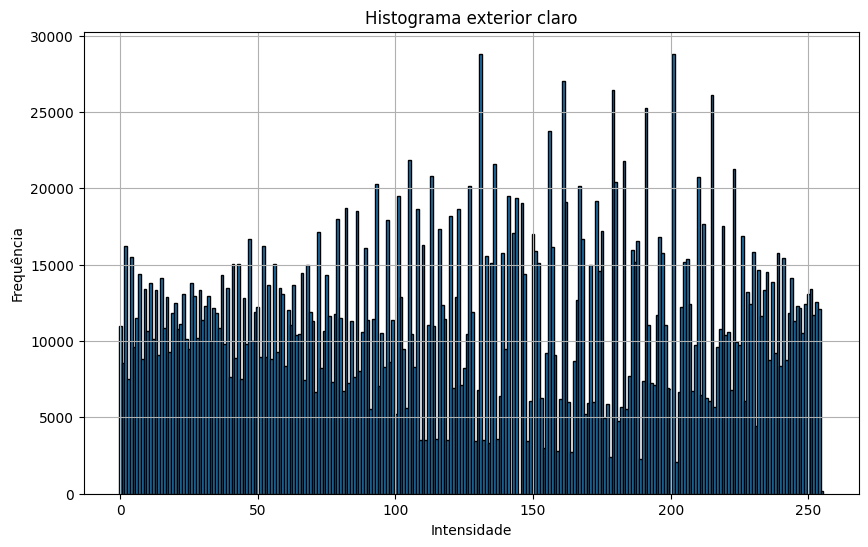

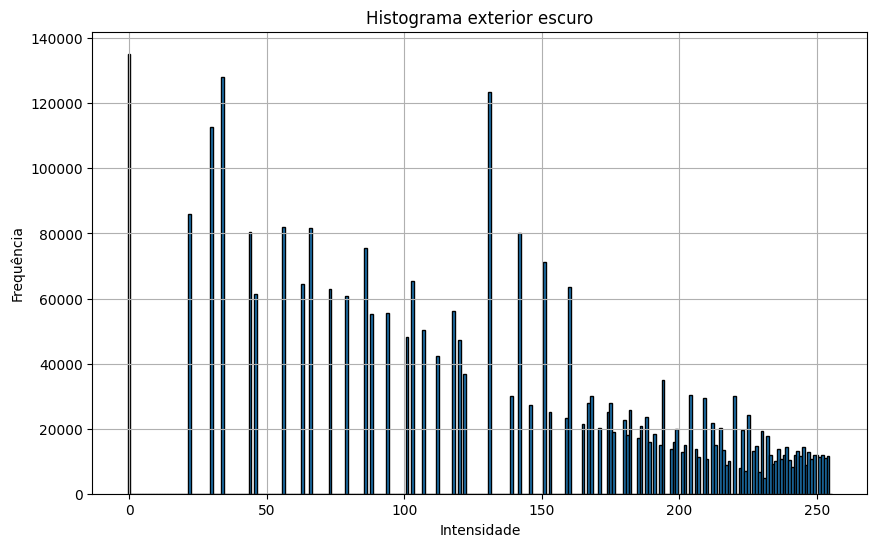

In [21]:
for light_title, images_titles in lightDict.items():
  images = get_images_by_names(gray_equalized_images, images_titles)
  hist = generate_mean_hist_from_images(images)
  show_hist(hist, light_title)

Augmented dataset

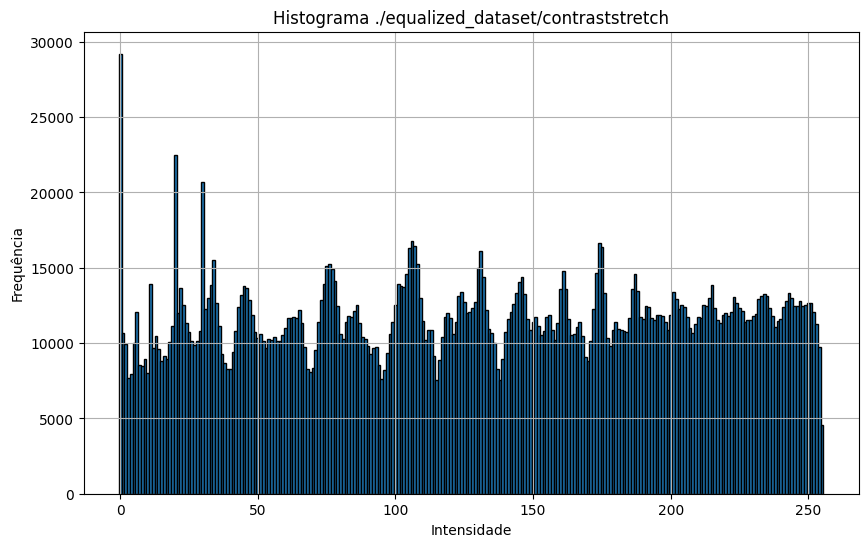

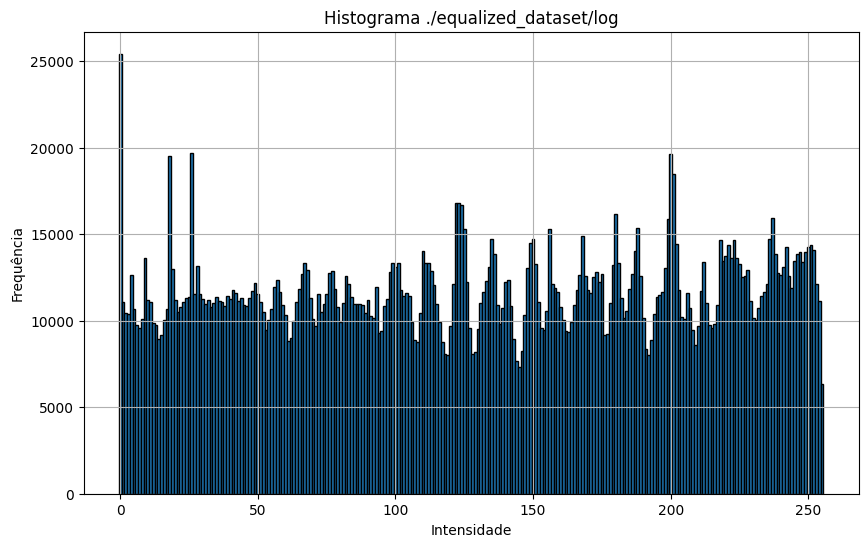

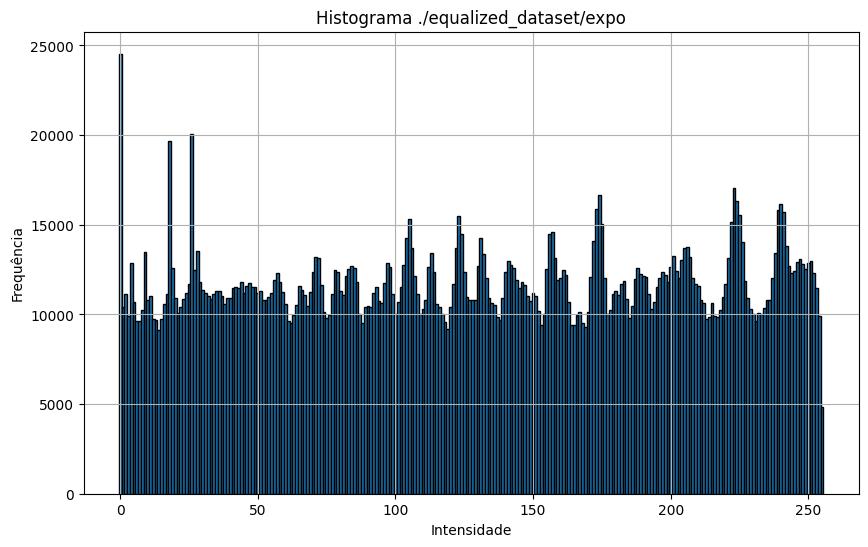

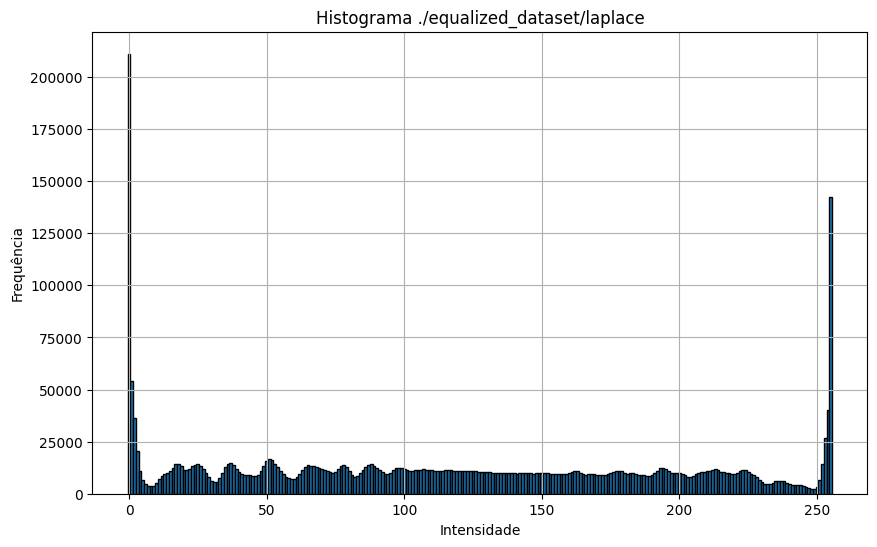

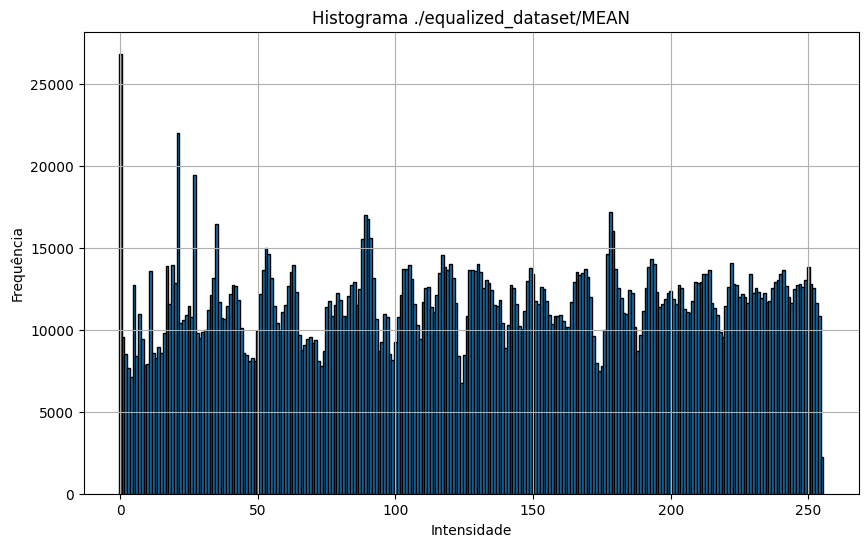

In [22]:
datasets = [EQUALIZED_DATASET_CONTRAST_STRETCH, EQUALIZED_DATASET_LOG, EQUALIZED_DATASET_EXPO, EQUALIZED_DATASET_LAPLACE, EQUALIZED_DATASET_MEAN]
for dataset in datasets:
  images = [(f, imread(join(dataset, f))) for f in listdir(dataset)]
  hist = generate_mean_hist_from_images(images)
  show_hist(hist, dataset)

# Comparing images

Gray dataset

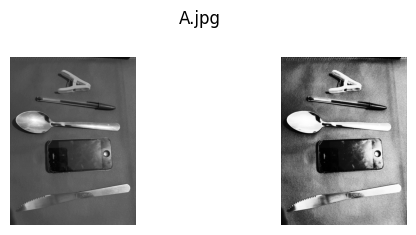

-----------------------------------------


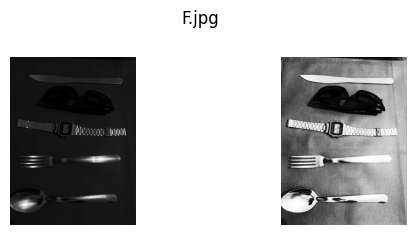

-----------------------------------------


In [23]:
for image_name in [sorted(listdir(DATASET_GRAY))[0], sorted(listdir(DATASET_GRAY))[5]]:
  original = get_images_by_names(gray_dataset, [image_name])[0]
  equalized = get_images_by_names(gray_equalized_images, [image_name])[0]
  plot_images(image_name, [original, equalized])
  print("-----------------------------------------")

Augmented dataset

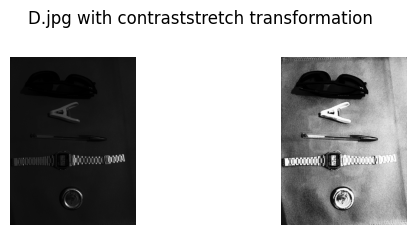

-----------------------------------


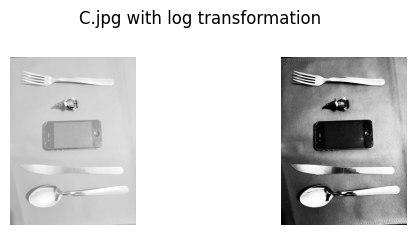

-----------------------------------


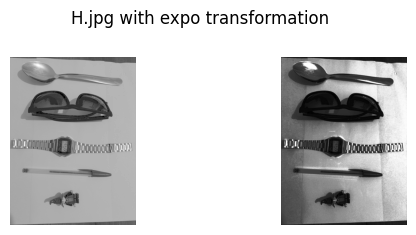

-----------------------------------


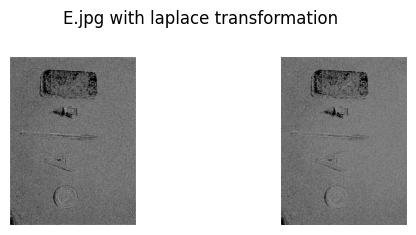

-----------------------------------


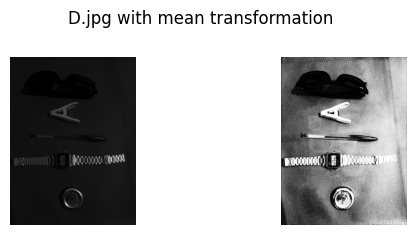

-----------------------------------


In [24]:
datasets = [
            (AUGMENTED_DATASET_CONTRAST_STRETCH, EQUALIZED_DATASET_CONTRAST_STRETCH, 3),
            (AUGMENTED_DATASET_LOG, EQUALIZED_DATASET_LOG, 2),
            (AUGMENTED_DATASET_EXPO, EQUALIZED_DATASET_EXPO, 7),
            (AUGMENTED_DATASET_LAPLACE, EQUALIZED_DATASET_LAPLACE, 4),
            (AUGMENTED_DATASET_MEAN, EQUALIZED_DATASET_MEAN, 3)
            ]

for dataset in datasets:
  dataset_original, dataset_equalized, index = dataset
  image_name = sorted(listdir(dataset_original))[index]
  image_original = imread(join(dataset_original, image_name))
  image_equalized = imread(join(dataset_equalized, image_name))
  plot_images(f"{image_name} with {dataset_original.removeprefix('./augmented_dataset/')} transformation", [(image_name, image_original), (image_name, image_equalized)])
  print("-----------------------------------")



# Discussão

A aplicação da normalização do histograma obteve sucesso ao distribuir a frequência das intensidade de maneira consistente em todos cenários exceto a imagem laplaciana, isso se dá devido ao histograma original da transformação de laplace ser extremamente concentrado nas bordas, com isso, a normalização não é capaz de deixar o histograma tão normalizado quanto os outros, que apresentam um distribuição próxima a uniforme.

Em relação ao resultado visual nas imagens, podemos observar que as imagens, em todos cenários, tiveram uma melhora de visibilidade do formato da imagens, o que implicaria em uma melhor classificação dos objetos levando em conta o classficador de borda. Além disso, as imagens mais claras tiveram suas intensidades menores realçadas (escurecendo e dando mais detalhes a imagem), enquanto as imagens mais escuras tiveram suas intensidades mais claras realçadas (clareando a imagem e dando mais relevância ao contrastes).